In [53]:
# imports
import sympy as sp
from sympy import Matrix, MatrixSymbol, MatMul
sp.init_printing()
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
from scipy.optimize import fsolve
from sympy.utilities.lambdify import lambdify
import mpmath


In [125]:
# constants
Lc=sp.Symbol('L_c')
Lc=1 #CHANGEABLE
Vc=sp.Symbol('V_c')
Vc=9/8 #CHANGEABLE
h=sp.Symbol('\hbar')
h=1 #CHANGEABLE

In [126]:
# dimensional parameters
n=sp.Symbol('n')
n=255 #CHANGEABLE
A=sp.Symbol('A')
A=-8 #CHANGEABLE
B=sp.Symbol('B')
B=8 #CHANGEABLE
S=sp.Symbol('S')
S=(B-A)/(n+1)
D=sp.Symbol('D')
D=1 #CHANGEABLE
c=sp.Symbol('c')
c = 0.01 #changable
M=sp.Symbol('M')
M=1 #CHANGEABLE
#E0=h*Omega/2
#Epsilon=sp.Symbol('\varepsilon')
#Epsilon=E0*(1+2*np.linspace(0,9,10)) #\varepsilon=(1+2j)*\varepsilon_0 FOR j=0,1,...
# Epsilon

In [127]:
# non-dimensional parameters
a=sp.Symbol('a')
a=A/Lc
b=sp.Symbol('b')
b=B/Lc
s=sp.Symbol('s')
s=S/Lc
# epsilon=sp.Symbol('\epsilon')
# epsilon=Epsilon/Vc
# a,b,A,B,s,S

In [128]:
# dimensional grid
Xi=sp.Symbol('X_i')
Xi=np.linspace(A,B,n)
# non-dimensional grid
xi=sp.Symbol('x_i')
xi=np.linspace(a,b,n)
# Xi,xi

In [129]:
# dimensional  potential
V=sp.Function('V_{QHO}')
def V(X,D,c):
    return Vc*(c*np.cosh(D*X)-1)**2
# non-dimensional  potential
v=sp.Function('v_{QHO}')
def v(V):
    return V/Vc
vi=sp.Symbol('v_i')
vi=v(V(Xi,D,c))
#vi

In [130]:
# auxiliary variables
alpha=sp.Symbol('\alpha')
alpha=(2*M*Vc)/(D*D*h*h)
vit=sp.Symbol('\widetilde{v_i}')
vit=s*s*alpha*vi
# vit

In [131]:
# hamiltonian operator
H=sp.MatrixSymbol('H',n,n)
# H= -1*np.eye(n,n,k=-1) + (2+(M*Omega*S*S*M*Omega*Xi*Xi)/(h*h))*np.eye(n,n) + -1*np.eye(n,n,k=1)
H= -1*np.eye(n,n,k=-1) + (2+vit)*np.eye(n,n) + -1*np.eye(n,n,k=1)
# Matrix(H)

In [139]:
# eigenvalues and eigenvectors
eigval=np.linalg.eigh(H)[0]
eigvec=np.linalg.eigh(H)[1]
# np.linalg.eig(H)
eigval[2]/(s*s*alpha)

In [134]:
# warunek unormowania
# =========================
i=0
sum=0
while i<n:
    sum=sum+(eigvec[i][0])**2 #chyba to????? (bo symetryczne)
    # sum=sum+(eigvec[0][i])**2 #?????
    i=i+1
sum
# Matrix(np.linalg.eig(H)[1][0])

In [135]:
# transpose eigvec
Psi=eigvec.T
# Matrix(Psi)

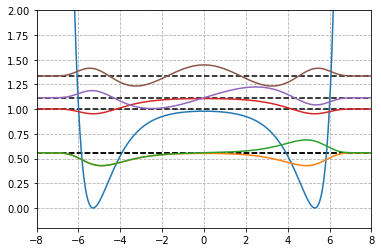

In [140]:
# graph
plt.xlim(-8,8)
plt.ylim(-0.2,2)
plt.plot(Xi, vi)
i=0

for i in range(0,5):
    plt.plot(Xi,Psi[i]+eigval[i]/(s*s*alpha))
    plt.hlines(eigval[i]/(s*s*alpha),A,B,color='black',ls='--')
    

plt.grid(ls='--')